In [38]:
from LogRegCCD_script import LogRegCCD

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    f1_score,
    recall_score,
    precision_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt

### Breast cancer dataset

In [26]:
# 1. Load dataset
df = pd.read_csv("D:\AMLpro\datasets\prepared_breast_cancer.csv")
df

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,fractal dimension error_perm_244,mean fractal dimension_perm_245,compactness error_perm_246,texture error_perm_247,worst radius_perm_248,worst perimeter_perm_249,worst area_perm_250,mean texture_perm_251,mean symmetry_perm_252,mean area_perm_253
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.002961,0.06140,0.014270,1.1940,25.74,91.88,349.9,26.60,0.1705,394.1
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.001952,0.06403,0.018200,1.0500,16.41,112.50,1645.0,14.44,0.1773,372.7
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.004572,0.07469,0.020170,1.1690,13.46,71.25,1359.0,15.56,0.1713,800.0
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.001661,0.06100,0.022770,1.0050,11.60,76.51,925.1,17.52,0.2035,656.4
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.004613,0.05623,0.027680,1.6780,18.07,86.97,624.0,24.68,0.1409,807.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,...,0.001750,0.06576,0.022030,1.3670,17.91,85.67,1153.0,16.67,0.1707,657.1
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,...,0.003674,0.05866,0.010380,1.1780,14.48,113.70,616.7,21.53,0.1627,588.7
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,...,0.004571,0.06401,0.008776,1.2650,17.31,155.00,355.2,19.82,0.1399,644.2
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,...,0.005822,0.05647,0.005697,0.4875,23.37,57.26,1809.0,24.91,0.1739,713.3


In [27]:
# 2. Split features and labels
X = df.drop(columns=['target']).values
y = df['target'].values

In [28]:
X

array([[1.799e+01, 1.038e+01, 1.184e-01, ..., 2.660e+01, 1.705e-01,
        3.941e+02],
       [2.057e+01, 1.777e+01, 8.474e-02, ..., 1.444e+01, 1.773e-01,
        3.727e+02],
       [1.969e+01, 2.125e+01, 1.096e-01, ..., 1.556e+01, 1.713e-01,
        8.000e+02],
       ...,
       [1.660e+01, 2.808e+01, 8.455e-02, ..., 1.982e+01, 1.399e-01,
        6.442e+02],
       [2.060e+01, 2.933e+01, 1.178e-01, ..., 2.491e+01, 1.739e-01,
        7.133e+02],
       [7.760e+00, 2.454e+01, 5.263e-02, ..., 2.397e+01, 1.735e-01,
        5.238e+02]])

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 4. Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# 5. Train LogRegCCD model
#model_ccd = LogRegCCD(lambdas=np.logspace(-4, 0, 20), max_iter=1000, tol=1e-6)

lambdas_with_zero = np.append(np.logspace(-4, 0, 20), 0.0)
model_ccd = LogRegCCD(lambdas=lambdas_with_zero, max_iter=1000, tol=1e-6)

model_ccd.fit(X_train, y_train)

# Predict using LogRegCCD for lambda = 0
ccd_probs_0 = model_ccd.predict_proba(X_test, lmbd=0.0)
ccd_preds_0 = (ccd_probs_0 >= 0.5).astype(int)

# Get best lambda using validation
best_lambda, _ = model_ccd.validate(X_test, y_test, metric='roc_auc')
ccd_probs = model_ccd.predict_proba(X_test, lmbd=best_lambda)
ccd_preds = (ccd_probs >= 0.5).astype(int)

In [33]:
# 6. Train baseline LogisticRegression (no regularization)
model_sklearn = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_sklearn.fit(X_train, y_train)
sklearn_probs = model_sklearn.predict_proba(X_test)[:, 1]
sklearn_preds = model_sklearn.predict(X_test)

In [34]:
# 6a. Train LogisticRegression with L1 penalty (baseline with regularization)
model_sklearn_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_sklearn_l1.fit(X_train, y_train)
sklearn_l1_probs = model_sklearn_l1.predict_proba(X_test)[:, 1]
sklearn_l1_preds = model_sklearn_l1.predict(X_test)

In [35]:
# 7. Evaluate all models
metrics = {
    "ROC AUC": roc_auc_score,
    "PR AUC": average_precision_score,
    "F1": f1_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "Balanced Accuracy": balanced_accuracy_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        "LogRegCCD (best λ)": func(y_test, ccd_preds if "AUC" not in name else ccd_probs),
        "LogRegCCD (λ = 0)": func(y_test, ccd_preds_0 if "AUC" not in name else ccd_probs_0),
        "LogReg (sklearn)": func(y_test, sklearn_preds if "AUC" not in name else sklearn_probs),
        "LogReg (sklearn, L1)": func(y_test, sklearn_l1_preds if "AUC" not in name else sklearn_l1_probs)
    }

In [36]:
# 8. Show results
df_results = pd.DataFrame(results).T
print("Evaluation Metrics Comparison:")
print(df_results)

Evaluation Metrics Comparison:
                   LogRegCCD (best λ)  LogRegCCD (λ = 0)  LogReg (sklearn)  \
ROC AUC                      0.987553           0.961022          0.957746   
PR AUC                       0.992730           0.975225          0.976111   
F1                           0.964029           0.930556          0.902778   
Recall                       0.943662           0.943662          0.915493   
Precision                    0.985294           0.917808          0.890411   
Balanced Accuracy            0.960203           0.902064          0.864723   

                   LogReg (sklearn, L1)  
ROC AUC                        0.999017  
PR AUC                         0.999405  
F1                             0.978723  
Recall                         0.971831  
Precision                      0.985714  
Balanced Accuracy              0.974288  


In [14]:
# 9. Compare coefficients
ccd_coefs_best = model_ccd.coefs[best_lambda][1:]  # skip bias
ccd_coefs_0 = model_ccd.coefs[0.0][1:]
sklearn_coefs = model_sklearn.coef_[0]

df_coefs = pd.DataFrame({
    "Feature": df.drop(columns=['target']).columns,
    "LogRegCCD (best λ)": ccd_coefs_best,
    "LogRegCCD (λ = 0)": ccd_coefs_0,
    "LogReg (sklearn)": sklearn_coefs
})
print("\nCoefficient Comparison:")
print(df_coefs)


Coefficient Comparison:
                      Feature  LogRegCCD (best λ)  LogRegCCD (λ = 0)  \
0                 mean radius           -0.000249          -0.000761   
1                mean texture           -0.000000          -0.000441   
2             mean smoothness           -0.000000          -0.000396   
3            mean compactness           -0.000113          -0.000624   
4              mean concavity           -0.000212          -0.000723   
..                        ...                 ...                ...   
269  worst perimeter_perm_249            0.000000           0.000040   
270       worst area_perm_250           -0.000000          -0.000002   
271     mean texture_perm_251           -0.000000          -0.000061   
272    mean symmetry_perm_252           -0.000000          -0.000037   
273        mean area_perm_253           -0.000000          -0.000023   

     LogReg (sklearn)  
0           -3.970275  
1           -2.505832  
2           -0.605181  
3           -0

In [15]:
# 11. Print min and max coefficient values for all models
ccd_min = df_coefs["LogRegCCD (best λ)"].min()
ccd_max = df_coefs["LogRegCCD (best λ)"].max()
ccd0_min = df_coefs["LogRegCCD (λ = 0)"].min()
ccd0_max = df_coefs["LogRegCCD (λ = 0)"].max()
sklearn_min = df_coefs["LogReg (sklearn)"].min()
sklearn_max = df_coefs["LogReg (sklearn)"].max()

print("\nCoefficient Value Ranges:")
print(f"LogRegCCD (best λ)    → min: {ccd_min:.6f}, max: {ccd_max:.6f}")
print(f"LogRegCCD (λ = 0)     → min: {ccd0_min:.6f}, max: {ccd0_max:.6f}")
print(f"LogReg (sklearn)      → min: {sklearn_min:.6f}, max: {sklearn_max:.6f}")


Coefficient Value Ranges:
LogRegCCD (best λ)    → min: -0.000249, max: -0.000000
LogRegCCD (λ = 0)     → min: -0.000761, max: 0.000169
LogReg (sklearn)      → min: -3.970275, max: 2.064281


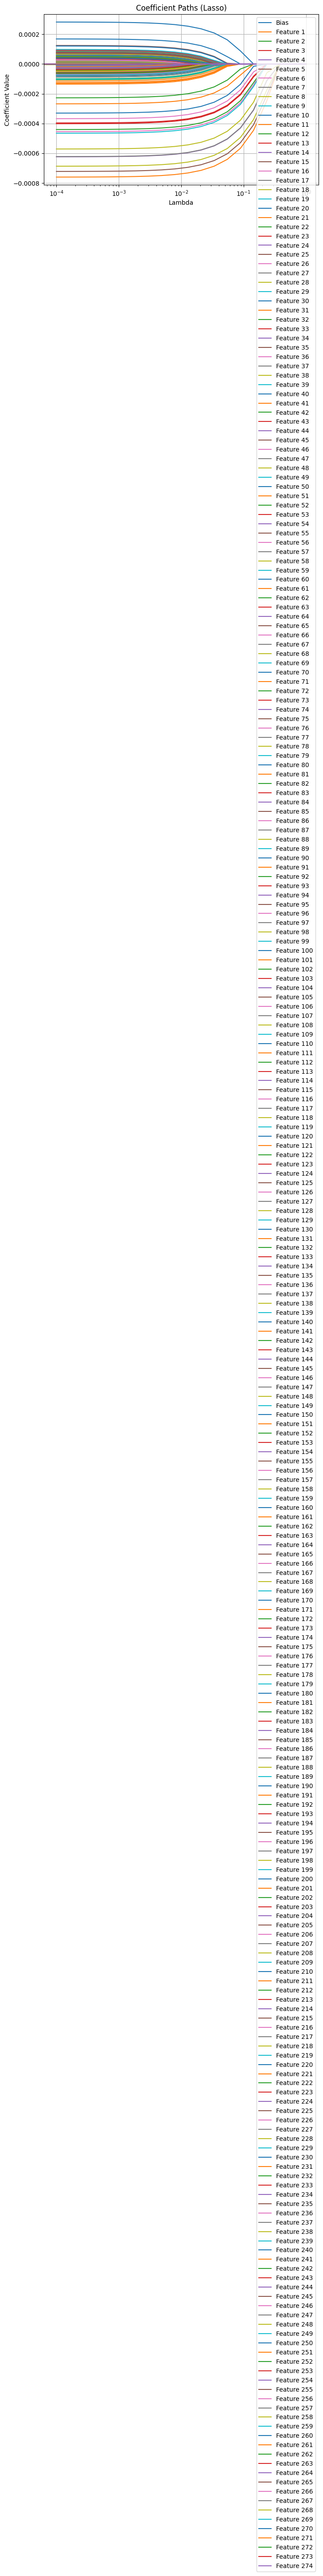

In [16]:
model_ccd.plot_coefficients()

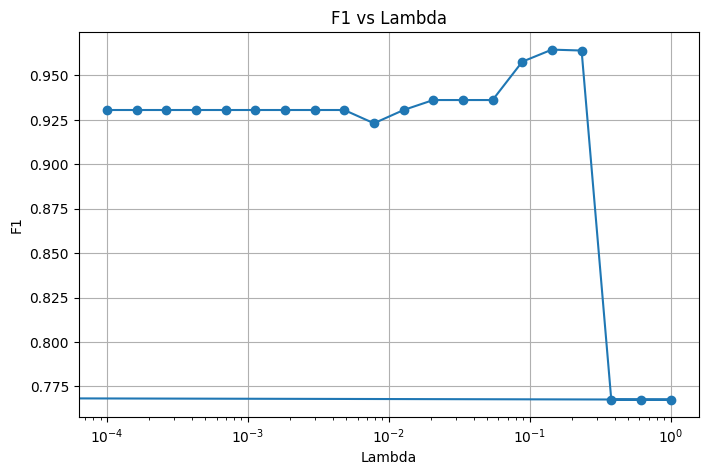

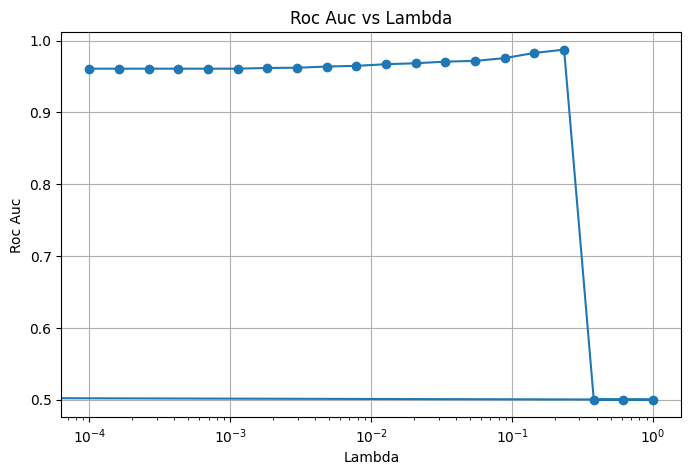

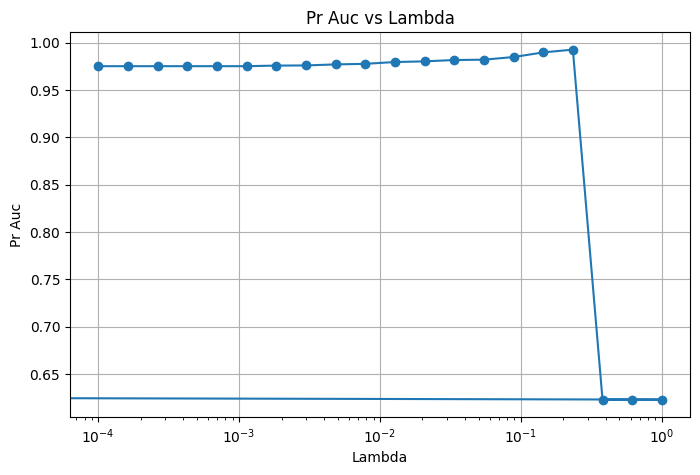

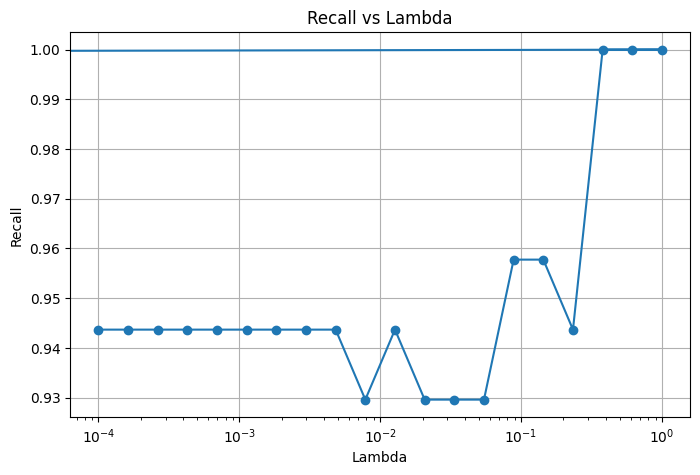

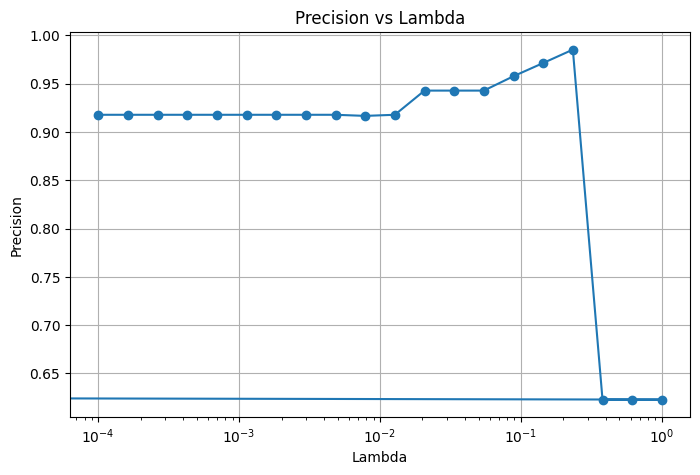

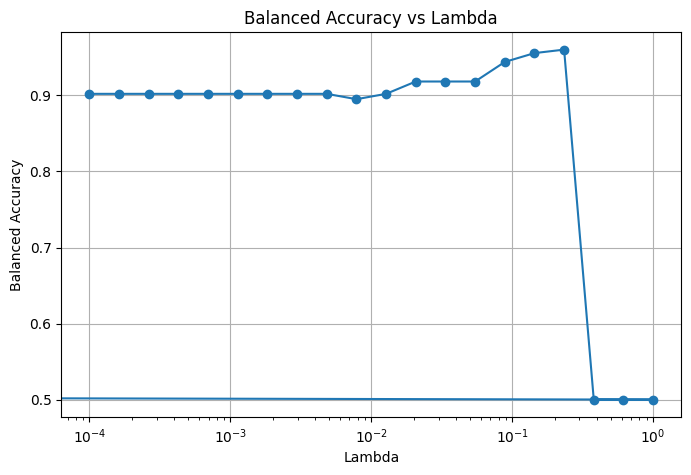

In [17]:
model_ccd.plot(X_test, y_test, metric='f1')
model_ccd.plot(X_test, y_test, metric='roc_auc')
model_ccd.plot(X_test, y_test, metric='pr_auc')
model_ccd.plot(X_test, y_test, metric='recall')
model_ccd.plot(X_test, y_test, metric='precision')
model_ccd.plot(X_test, y_test, metric='balanced_accuracy')

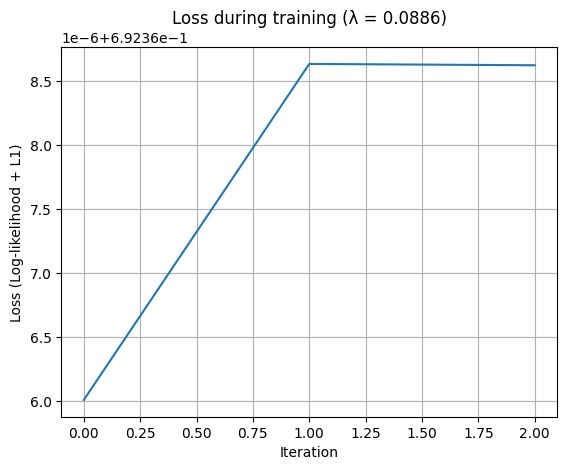

In [18]:
lambda_target = 0.1
closest_lambda = min(model_ccd.training_history.keys(), key=lambda x: abs(x - lambda_target))

loss_history = model_ccd.training_history[closest_lambda]["loss"]

plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (Log-likelihood + L1)")
plt.title(f"Loss during training (λ = {closest_lambda:.4f})")
plt.grid(True)
plt.show()

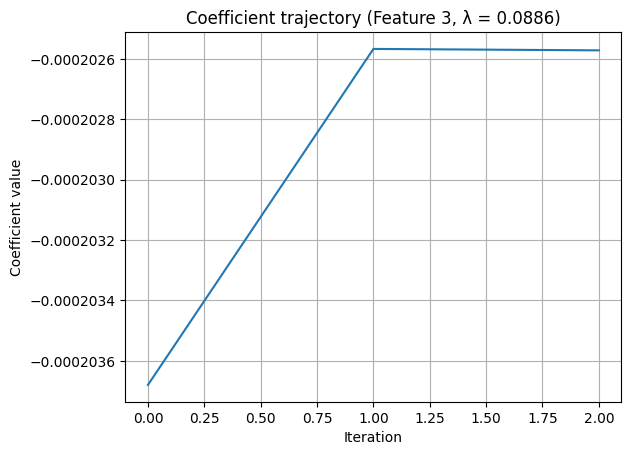

In [19]:
coefs_history = np.array(model_ccd.training_history[closest_lambda]["coefs"])

plt.plot(coefs_history[:, 3])  # e.g. coefficient for feature no. 3
plt.xlabel("Iteration")
plt.ylabel("Coefficient value")
plt.title(f"Coefficient trajectory (Feature 3, λ = {closest_lambda:.4f})")
plt.grid(True)
plt.show()

### Ionosphere dataset

In [37]:
df = pd.read_csv("D:\AMLpro\datasets\prepared_ionosphere.csv")
df

X = df.drop(columns=['target']).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lambdas_with_zero = np.append(np.logspace(-4, 0, 20), 0.0)
model_ccd = LogRegCCD(lambdas=lambdas_with_zero, max_iter=1000, tol=1e-6)

model_ccd.fit(X_train, y_train)

ccd_probs_0 = model_ccd.predict_proba(X_test, lmbd=0.0)
ccd_preds_0 = (ccd_probs_0 >= 0.5).astype(int)

best_lambda, _ = model_ccd.validate(X_test, y_test, metric='roc_auc')
ccd_probs = model_ccd.predict_proba(X_test, lmbd=best_lambda)
ccd_preds = (ccd_probs >= 0.5).astype(int)

model_sklearn = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_sklearn.fit(X_train, y_train)
sklearn_probs = model_sklearn.predict_proba(X_test)[:, 1]
sklearn_preds = model_sklearn.predict(X_test)

# 6a. Train LogisticRegression with L1 penalty (baseline with regularization)
model_sklearn_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_sklearn_l1.fit(X_train, y_train)
sklearn_l1_probs = model_sklearn_l1.predict_proba(X_test)[:, 1]
sklearn_l1_preds = model_sklearn_l1.predict(X_test)

metrics = {
    "ROC AUC": roc_auc_score,
    "PR AUC": average_precision_score,
    "F1": f1_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "Balanced Accuracy": balanced_accuracy_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        "LogRegCCD (best λ)": func(y_test, ccd_preds if "AUC" not in name else ccd_probs),
        "LogRegCCD (λ = 0)": func(y_test, ccd_preds_0 if "AUC" not in name else ccd_probs_0),
        "LogReg (sklearn)": func(y_test, sklearn_preds if "AUC" not in name else sklearn_probs),
        "LogReg (sklearn, L1)": func(y_test, sklearn_l1_preds if "AUC" not in name else sklearn_l1_probs)
    }
    

df_results = pd.DataFrame(results).T
print("Evaluation Metrics Comparison:")
print(df_results)

ccd_coefs_best = model_ccd.coefs[best_lambda][1:]  # skip bias
ccd_coefs_0 = model_ccd.coefs[0.0][1:]
sklearn_coefs = model_sklearn.coef_[0]

df_coefs = pd.DataFrame({
    "Feature": df.drop(columns=['target']).columns,
    "LogRegCCD (best λ)": ccd_coefs_best,
    "LogRegCCD (λ = 0)": ccd_coefs_0,
    "LogReg (sklearn)": sklearn_coefs
})
print("\nCoefficient Comparison:")
print(df_coefs)


ccd_min = df_coefs["LogRegCCD (best λ)"].min()
ccd_max = df_coefs["LogRegCCD (best λ)"].max()
ccd0_min = df_coefs["LogRegCCD (λ = 0)"].min()
ccd0_max = df_coefs["LogRegCCD (λ = 0)"].max()
sklearn_min = df_coefs["LogReg (sklearn)"].min()
sklearn_max = df_coefs["LogReg (sklearn)"].max()

print("\nCoefficient Value Ranges:")
print(f"LogRegCCD (best λ)    → min: {ccd_min:.6f}, max: {ccd_max:.6f}")
print(f"LogRegCCD (λ = 0)     → min: {ccd0_min:.6f}, max: {ccd0_max:.6f}")
print(f"LogReg (sklearn)      → min: {sklearn_min:.6f}, max: {sklearn_max:.6f}")

Evaluation Metrics Comparison:
                   LogRegCCD (best λ)  LogRegCCD (λ = 0)  LogReg (sklearn)  \
ROC AUC                      0.852159           0.798173          0.766611   
PR AUC                       0.842220           0.830678          0.818215   
F1                           0.837209           0.776471          0.824742   
Recall                       0.837209           0.767442          0.930233   
Precision                    0.837209           0.785714          0.740741   
Balanced Accuracy            0.793605           0.723007          0.715116   

                   LogReg (sklearn, L1)  
ROC AUC                        0.856312  
PR AUC                         0.882975  
F1                             0.863158  
Recall                         0.953488  
Precision                      0.788462  
Balanced Accuracy              0.780316  

Coefficient Comparison:
          Feature  LogRegCCD (best λ)  LogRegCCD (λ = 0)  LogReg (sklearn)
0             a01           

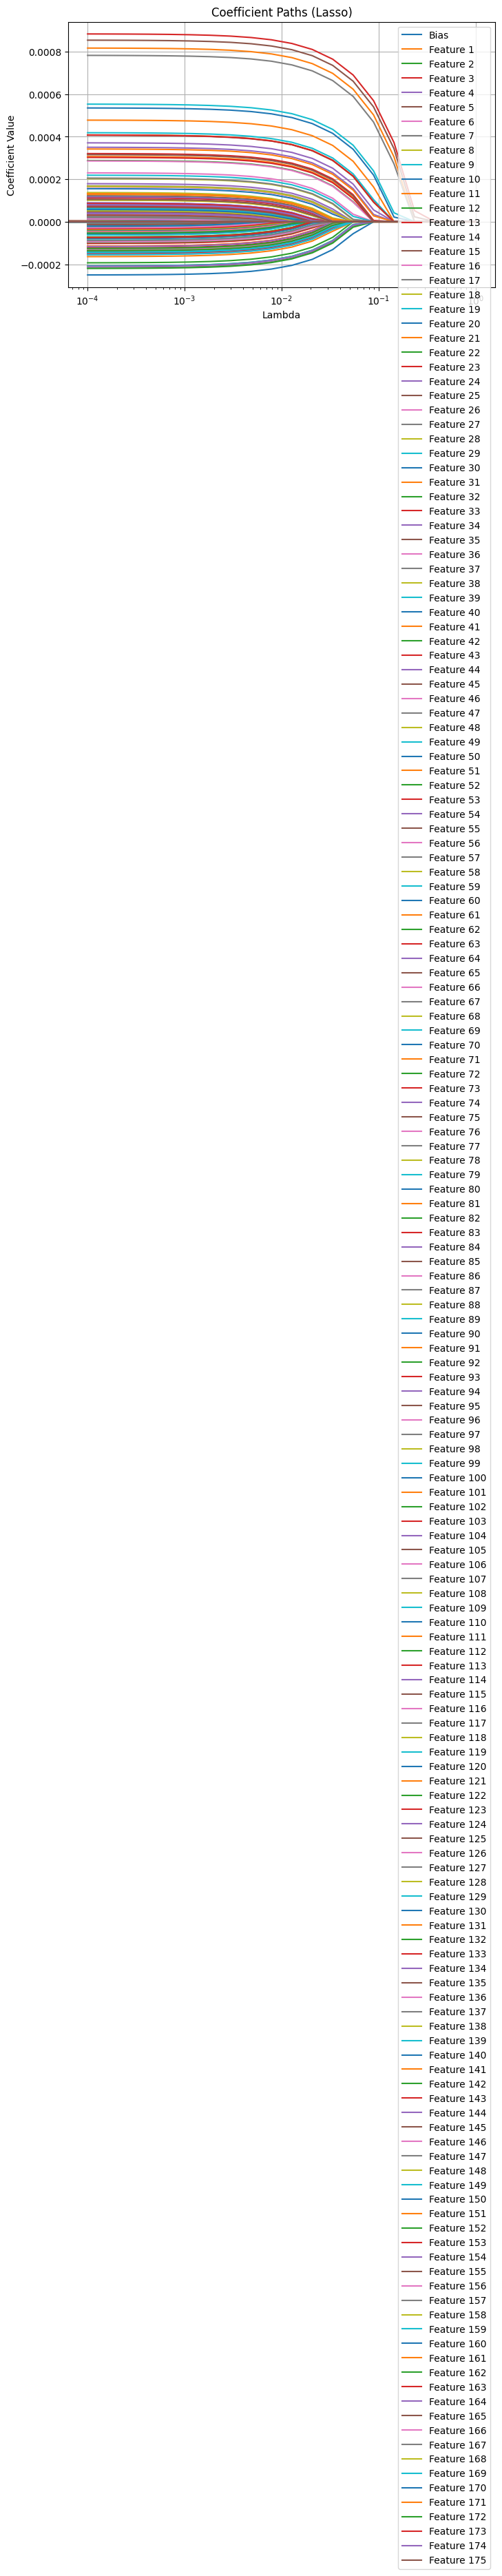

In [21]:
model_ccd.plot_coefficients()

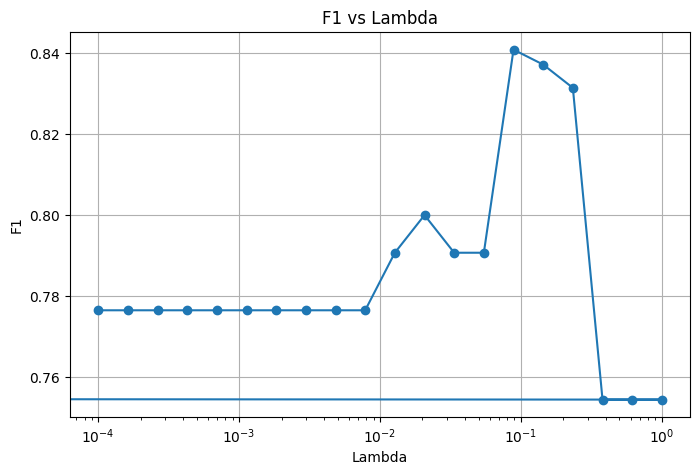

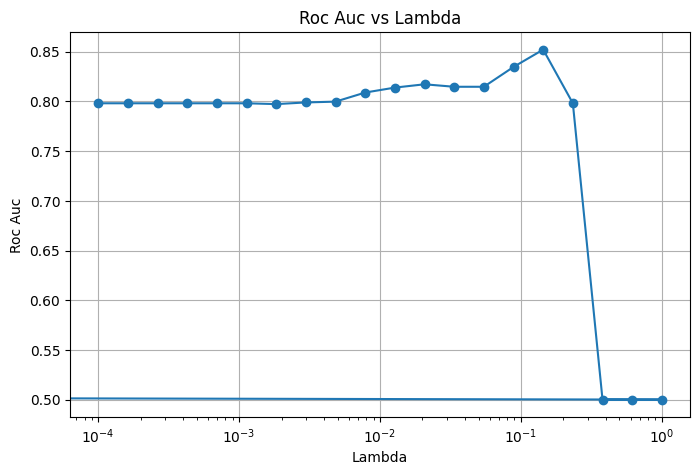

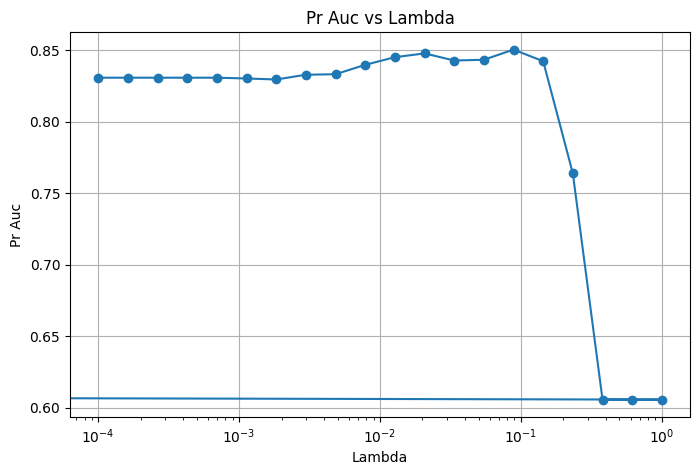

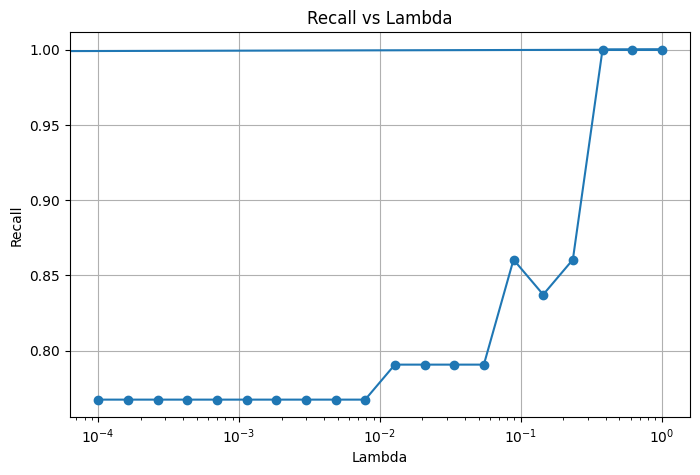

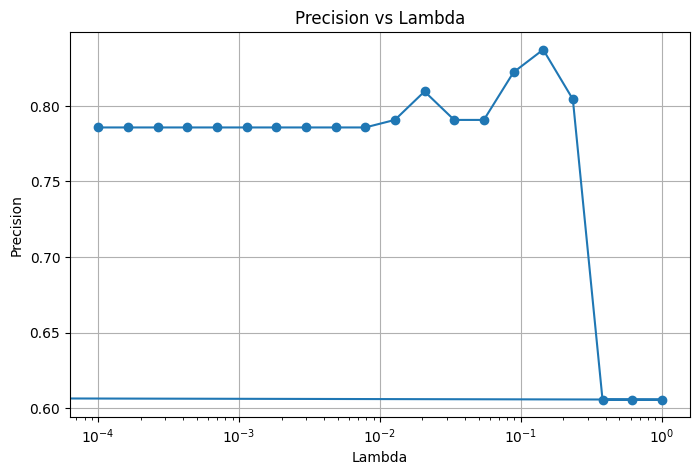

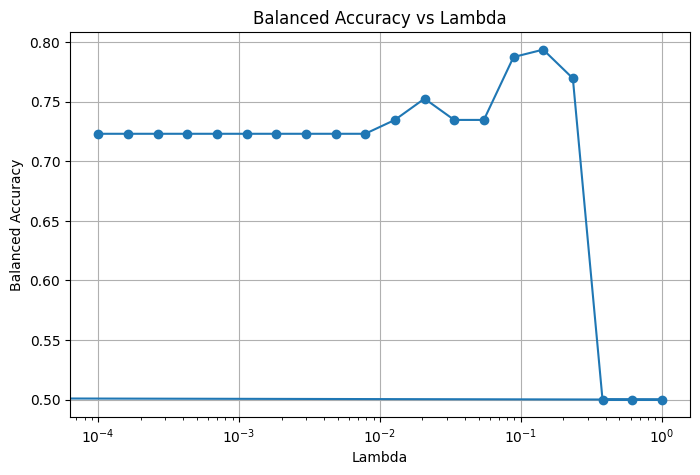

In [22]:
model_ccd.plot(X_test, y_test, metric='f1')
model_ccd.plot(X_test, y_test, metric='roc_auc')
model_ccd.plot(X_test, y_test, metric='pr_auc')
model_ccd.plot(X_test, y_test, metric='recall')
model_ccd.plot(X_test, y_test, metric='precision')
model_ccd.plot(X_test, y_test, metric='balanced_accuracy')

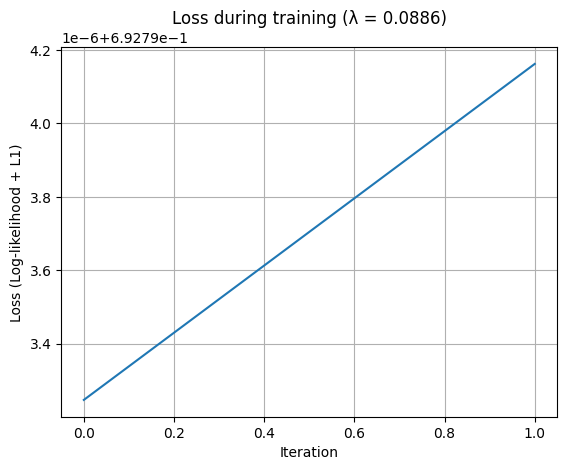

In [23]:
lambda_target = 0.1
closest_lambda = min(model_ccd.training_history.keys(), key=lambda x: abs(x - lambda_target))

loss_history = model_ccd.training_history[closest_lambda]["loss"]

plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (Log-likelihood + L1)")
plt.title(f"Loss during training (λ = {closest_lambda:.4f})")
plt.grid(True)
plt.show()

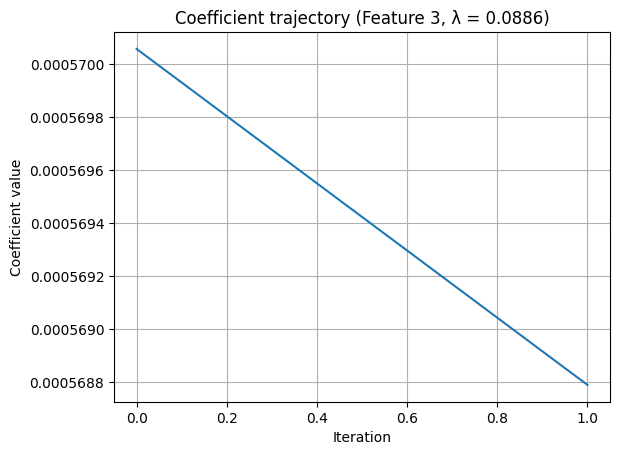

In [24]:
coefs_history = np.array(model_ccd.training_history[closest_lambda]["coefs"])

plt.plot(coefs_history[:, 3])  # e.g. coefficient for feature no. 3
plt.xlabel("Iteration")
plt.ylabel("Coefficient value")
plt.title(f"Coefficient trajectory (Feature 3, λ = {closest_lambda:.4f})")
plt.grid(True)
plt.show()